# Projeto: Previsão do preço de casas

Caso: Prever o preço da casa usando regressão

Link: https://www.kaggle.com/harlfoxem/housesalesprediction

Dados: Preços de casas vendidas de King County, em Seattle, entre maio de 2014 e maio de 2015.

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

# Etapa 2: Importação da base de dados

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [ ]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Below are the column descriptions that were given along with the dataset:



id — A notation for a house

date — Date house was sold

price — Price is prediction target

bedrooms Number of Bedrooms/House

bathrooms — Number of bathrooms/bedrooms

sqft_living — Square footage of the home

sqft_lot — Square footage of the lot

floors — Total floors (levels) in house

waterfront — House which has a view to a waterfront

view — Has been viewed

condition — How good the condition is ( Overall )

grade — Overall grade given to the housing unit, based on King County grading system

sqft_above — square footage of house apart from basement

sqft_basement — square footage of the basement

yr_built — Built Year


yr_renovated — Year when house was renovated

zipcode — Zipcode

lat — Latitude coordinate

long — Longitude coordinate

sqft_living15 — Living room area in 2015 (implies — some renovations) This

might or might not have affected the lotsize area

sqft_lot15 — Lot size area in 2015 (implies — some renovation



id — Uma notação para uma casa

date — Data em que a casa foi vendida

preço — O preço é o alvo de previsão

quartos Número de quartos/casa

banheiros — Número de banheiros/quartos

sqft_living — Metragem quadrada da casa

sqft_lot — Metragem quadrada do lote

andares — Total de andares (níveis) na casa

beira-mar — Casa com vista para o mar

visualizar — foi visualizado

condição — Quão boa é a condição (Geral)

grade — Nota geral dada à unidade habitacional, com base no sistema de classificação de King County

sqft_above — metragem quadrada da casa além do porão

sqft_basement — metragem quadrada do porão

yr_built — Ano de construção


yr_renovated — Ano em que a casa foi reformada

CEP - código postal

lat — coordenada de latitude

long — coordenada de longitude

sqft_living15 — Sala de estar em 2015 (implica — algumas reformas) Este

pode ou não ter afetado a área do lote

sqft_lot15 — Área do lote em 2015 (implica — algumas reformas

Qual a quantidade de registros havia no dataset original?

In [ ]:
house_df.shape

(21613, 21)

Qual a quantidade de atributos que cada registro possuía originalmente?

In [ ]:
house_df.shape

(21613, 21)

Nos dados importados, qual o ano de construção da casa mais antiga?

In [ ]:
house_df.yr_built.sort_values(ascending=True)

4697     1900
2961     1900
12369    1900
15016    1900
5236     1900
         ... 
21270    2015
17098    2015
7526     2015
20086    2015
14489    2015
Name: yr_built, Length: 21613, dtype: int64

Nos dados importados, qual o tamanho do maior imóvel?

In [ ]:
house_df.sqft_living.sort_values(ascending=False)

12777    13540
7252     12050
3914     10040
9254      9890
8092      9640
         ...  
4868       390
18379      384
860        380
15381      370
19452      290
Name: sqft_living, Length: 21613, dtype: int64

# Etapa 3: Visualização dos dados

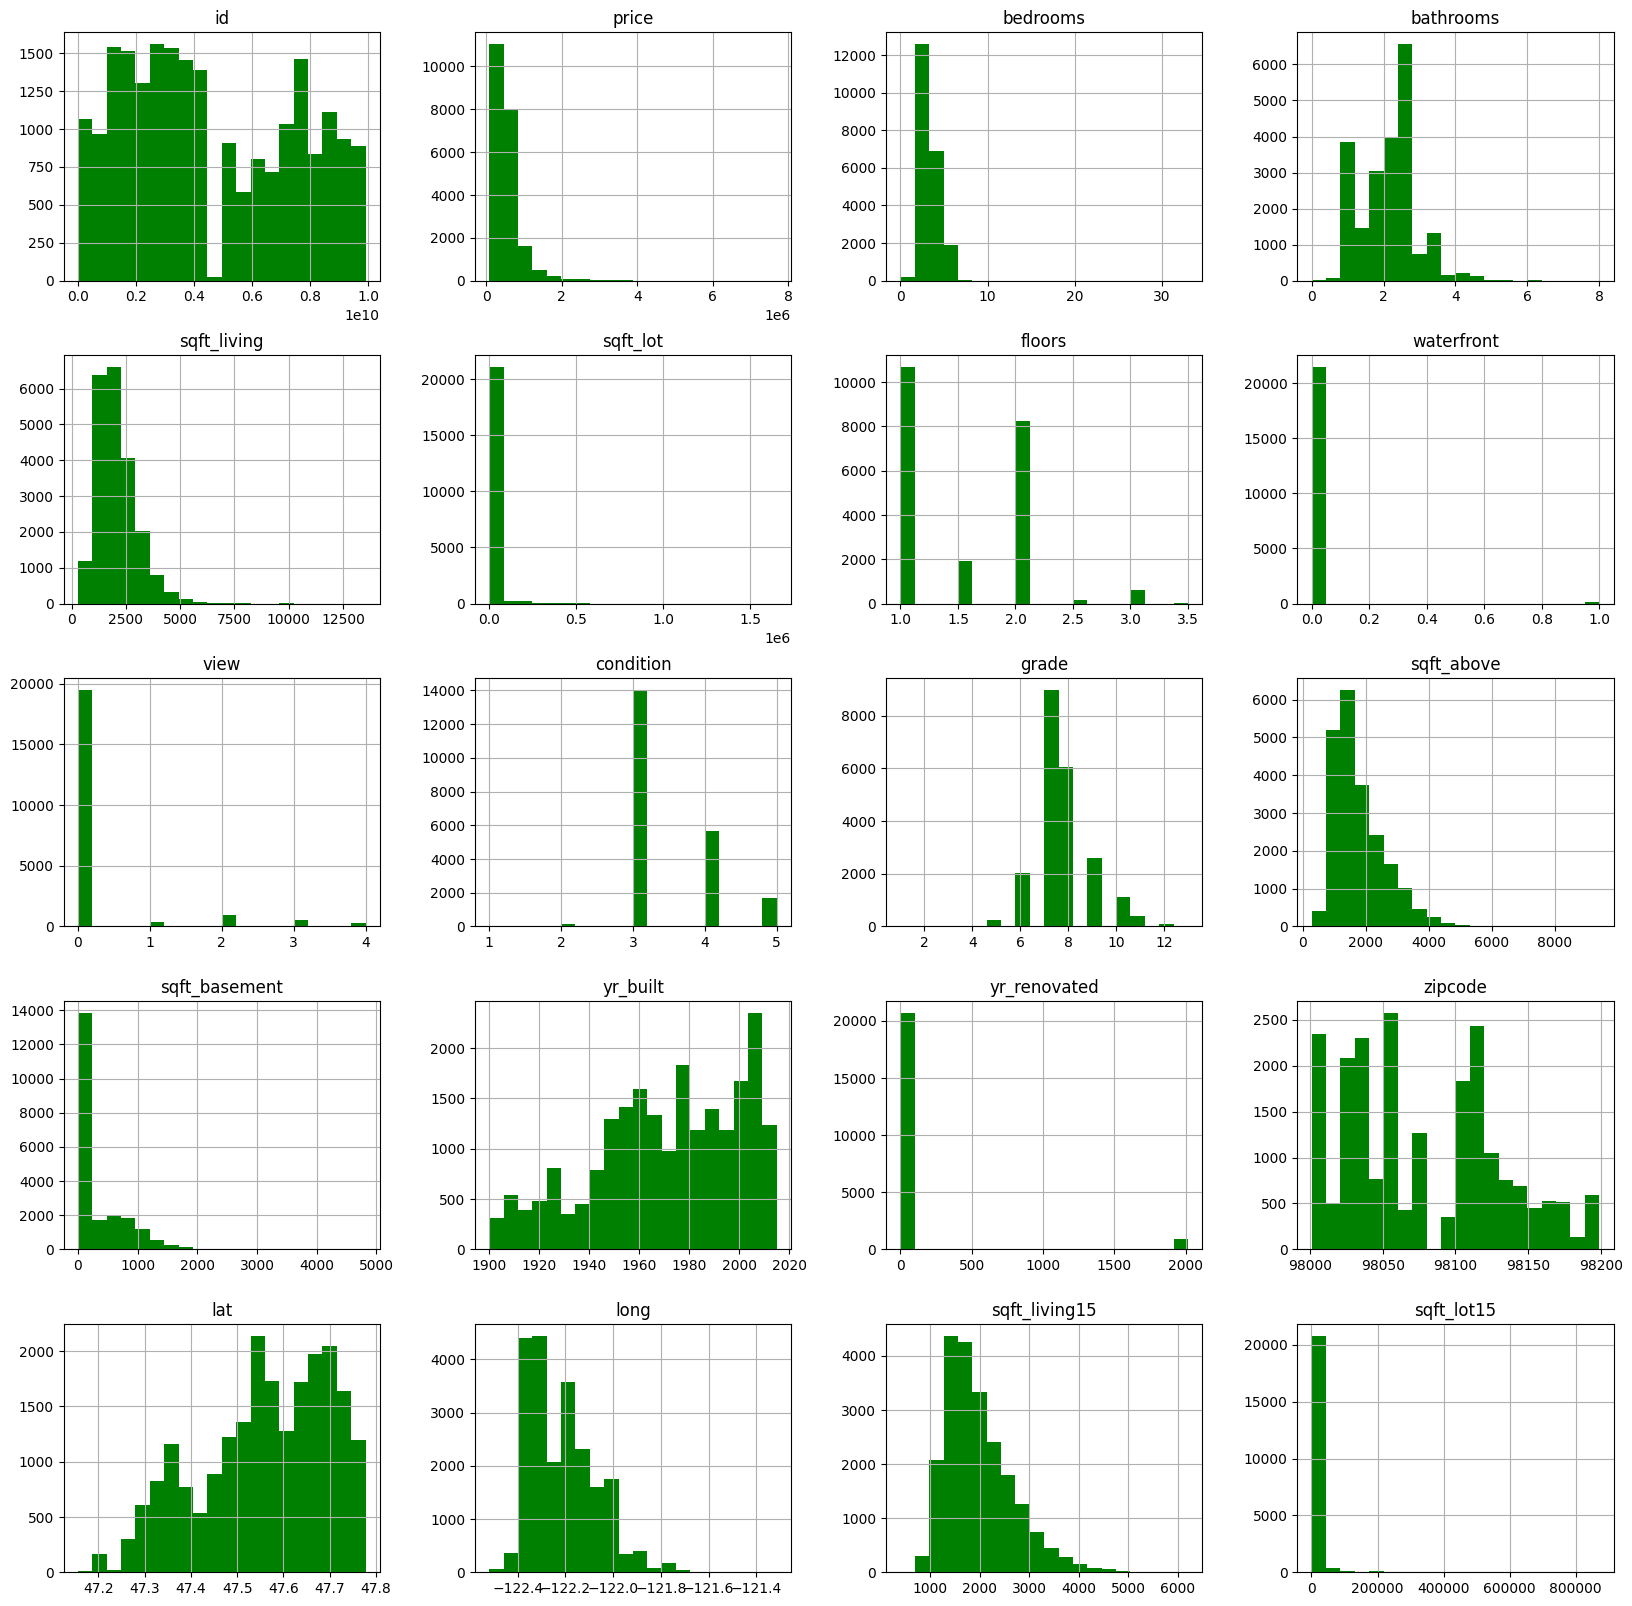

In [ ]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g');

In [ ]:
sns.pairplot(house_df);

Error in callback <function flush_figures at 0x7f1eaa989940> (for post_execute):


KeyboardInterrupt: ignored

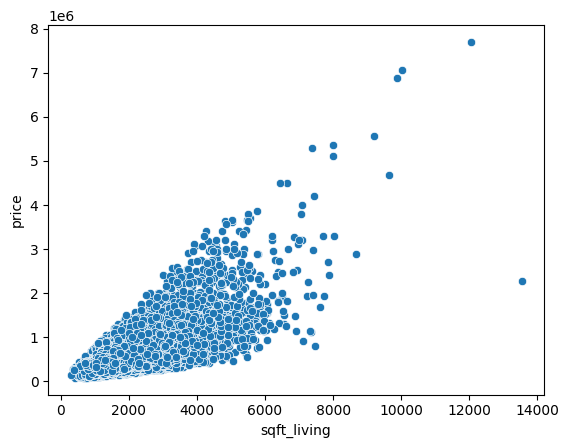

In [ ]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

Entre as opções abaixo, selecione o atributo que possui a maior relação com o preço:

In [ ]:
correlacao =house_df.corr()
correlacao

<ipython-input-21-bb1f6be29a1e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao =house_df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Entre as opções abaixo, selecione o atributo que possui a maior relação com o preço:

In [ ]:
correlacao =house_df.corr()
correlacao_price = correlacao['price']
correlacao_price.sort_values(ascending = False)

<ipython-input-13-cf8769c2e7bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao =house_df.corr()


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
#correlacao =house_df.corr()
correlacao_bathrooms = correlacao['bathrooms']
correlacao_bathrooms.sort_values(ascending = False)

bathrooms        1.000000
sqft_living      0.754665
sqft_above       0.685342
grade            0.664983
sqft_living15    0.568634
price            0.525138
bedrooms         0.515884
yr_built         0.506019
floors           0.500653
sqft_basement    0.283770
long             0.223042
view             0.187737
sqft_lot         0.087740
sqft_lot15       0.087175
waterfront       0.063744
yr_renovated     0.050739
lat              0.024573
id               0.005160
condition       -0.124982
zipcode         -0.203866
Name: bathrooms, dtype: float64

<ipython-input-22-a3c295940d82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_df.corr(), annot = True, cmap="YlGnBu");


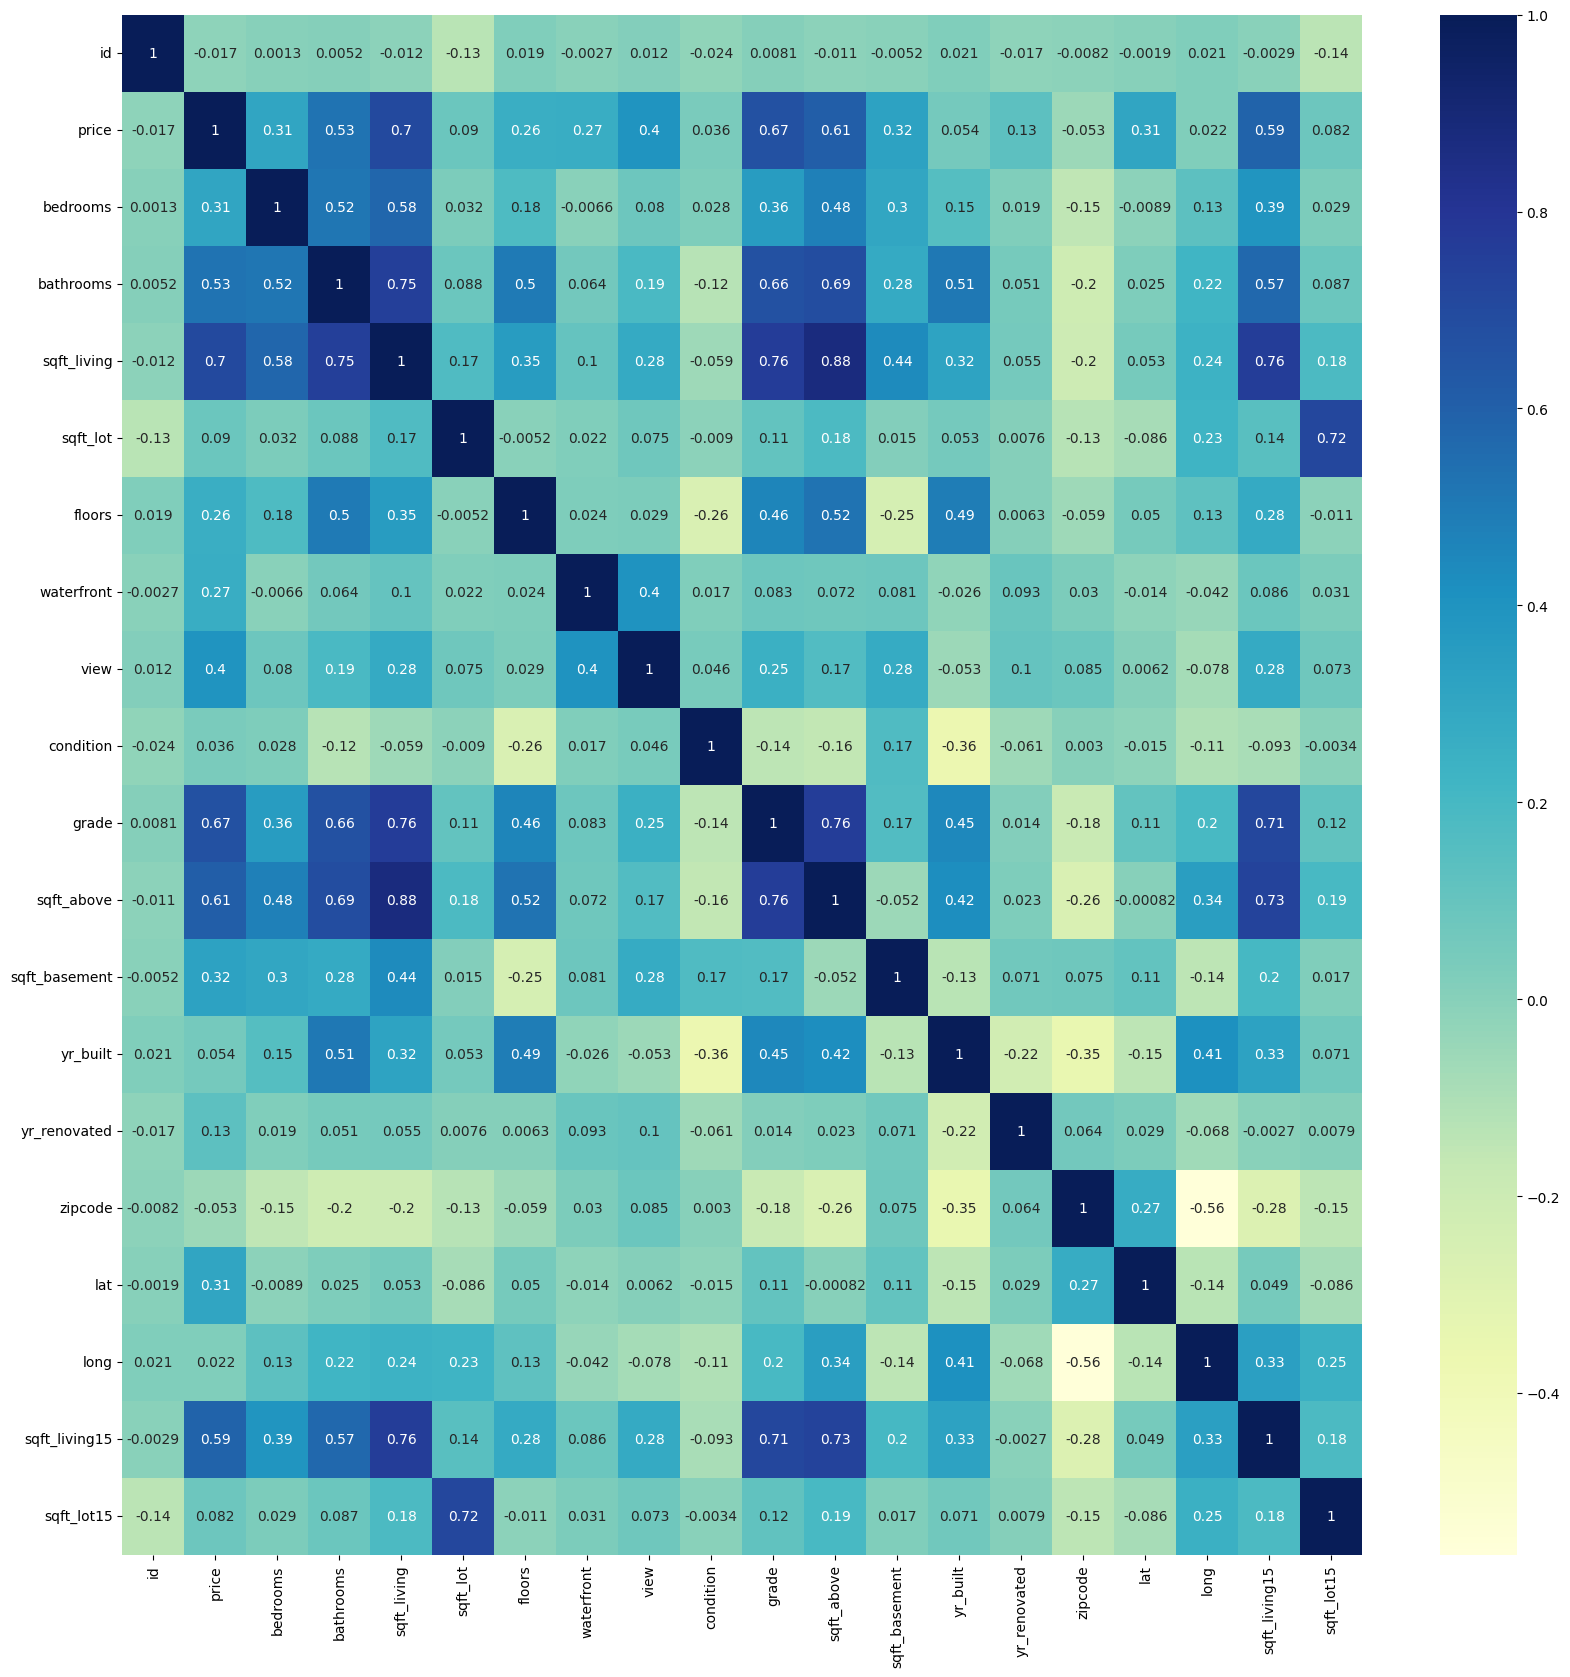

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True, cmap="YlGnBu");

# Etapa 4: Tratamento da base de dados

## 4.1: Tratamento da base de dados

* 0: sqft_lot:
* 1: sqft_living:
* 2: sqft_living e grade:
* 3: sqft_living e bedrooms:
* 3: sqft_living e bedrooms e sqft_above:
* Obs.: Testar se a feature "sqft_living" com "sqft_above" ou "sqft_basement"

In [ ]:
#selected_features = ['sqft_living', 'grade', 'bedrooms']
#selected_features = ['sqft_living', 'sqft_above', 'sqft_living15']
#selected_features = ['sqft_living', 'sqft_basement']
selected_features = ['sqft_living', 'view', 'grade', 'condition', 'floors']


In [ ]:
X = house_df[selected_features]

In [ ]:
X.head()

,sqft_living,view,grade,condition,floors
0,1180,0,7,3,1.0
1,2570,0,7,3,2.0
2,770,0,6,3,1.0
3,1960,0,7,5,1.0
4,1680,0,8,3,1.0


In [ ]:
y = house_df['price']

In [ ]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [ ]:
X.shape

(21613, 5)

In [ ]:
y.shape

(21613,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.06716981, 0.        , 0.5       , 0.5       , 0.        ],
       [0.17207547, 0.        , 0.5       , 0.5       , 0.4       ],
       [0.03622642, 0.        , 0.41666667, 0.5       , 0.        ],
       ...,
       [0.05509434, 0.        , 0.5       , 0.5       , 0.4       ],
       [0.09886792, 0.        , 0.58333333, 0.5       , 0.4       ],
       [0.05509434, 0.        , 0.5       , 0.5       , 0.4       ]])

In [ ]:
X_scaled.shape

(21613, 5)

In [ ]:
scaler.data_max_

array([1.354e+04, 4.000e+00, 1.300e+01, 5.000e+00, 3.500e+00])

In [ ]:
scaler.data_min_

array([290.,   0.,   1.,   1.,   1.])

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y.shape

(21613, 1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

## 4.2: Criação do dataset de treino (75%) e teste (25%)

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
X_train.shape

(16209, 5)

In [ ]:
X_train

array([[0.05056604, 0.        , 0.33333333, 1.        , 0.        ],
       [0.09207547, 0.        , 0.5       , 0.5       , 0.        ],
       [0.10415094, 0.        , 0.58333333, 0.75      , 0.        ],
       ...,
       [0.15622642, 0.        , 0.66666667, 0.75      , 0.        ],
       [0.15698113, 0.        , 0.58333333, 0.75      , 0.4       ],
       [0.15773585, 0.        , 0.5       , 0.5       , 0.        ]])

In [ ]:
X_train[1]

array([0.09207547, 0.        , 0.5       , 0.5       , 0.        ])

In [ ]:
X_test.shape

(5404, 5)

In [ ]:
X_test

array([[0.08603774, 0.        , 0.5       , 0.5       , 0.8       ],
       [0.33056604, 0.        , 0.91666667, 0.75      , 0.4       ],
       [0.08679245, 0.        , 0.5       , 0.5       , 0.        ],
       ...,
       [0.2354717 , 0.        , 0.75      , 0.5       , 0.4       ],
       [0.06716981, 0.        , 0.5       , 0.5       , 0.        ],
       [0.10037736, 0.        , 0.5       , 1.        , 0.2       ]])

# Etapa 5: Construção da Rede Neural e criação do modelo

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               600       
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')


In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0012 - val_loss: 8.3951e-04
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 9.6201e-04 - val_loss: 8.0912e-04
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 9.1121e-04 - val_loss: 7.7706e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 9.2572e-04 - val_loss: 8.7704e-04
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 8.8187e-04 - val_loss: 7.8390e-04
Epoch 6/100
260/260 [==============================] - 1s 4ms/step - loss: 9.1064e-04 - val_loss: 7.6490e-04
Epoch 7/100
260/260 [==============================] - 1s 4ms/step - loss: 8.6901e-04 - val_loss: 7.6623e-04
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5701e-04 - val_loss: 7.6283e-04
Epoch 9/100
260/260 [==============================] - 1s 4ms/step - loss: 8.8865e-04 - val_loss: 7.5910e-04
Epoch 10/100
260/260 [=

# Etapa 6: Avaliação do modelo

## 6.1: Exibir a progressão do erro

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

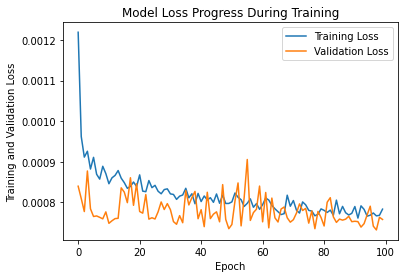

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

## 6.3 Avaliação do dataset de teste (criado lá em cima)
Vou aplicar o modelo no dataset desconhecido e ver se acertou (preciso gerar o accuracy depois!!)

In [ ]:
X_test.shape

(5404, 5)

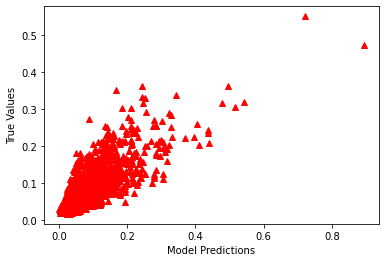

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

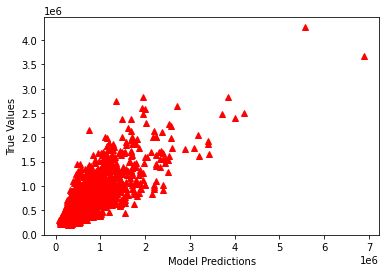

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 214213.213 
MSE = 45887300765.3358 
MAE = 142101.60866372133 
R2 = 0.6545686713605126 
Adjusted R2 = 0.6542487090331325
